In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

# parabola
from spaces.twoD import Parabola, SGDOneVariable, SGDOneVariableLRDecay
from spaces.twoD import SGDVisOneVariable

# 3d surfaces

# animation
from animation.scene import Scene, Video, GIFfromMP4Video

# Functions
A parabolic function  

In [2]:
xs = [i-5 for i in range(11)]
y =  xs
# f = Parabola(x_series=xs)
# f.plot_function()

In [3]:
xs

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]

# Gradient Descent

In [4]:
FILE_NAME_WO_EXTENSION = 'sgd'
PLOT_TITLE = 'SGD'
ITER = 100
N_BACK = 20

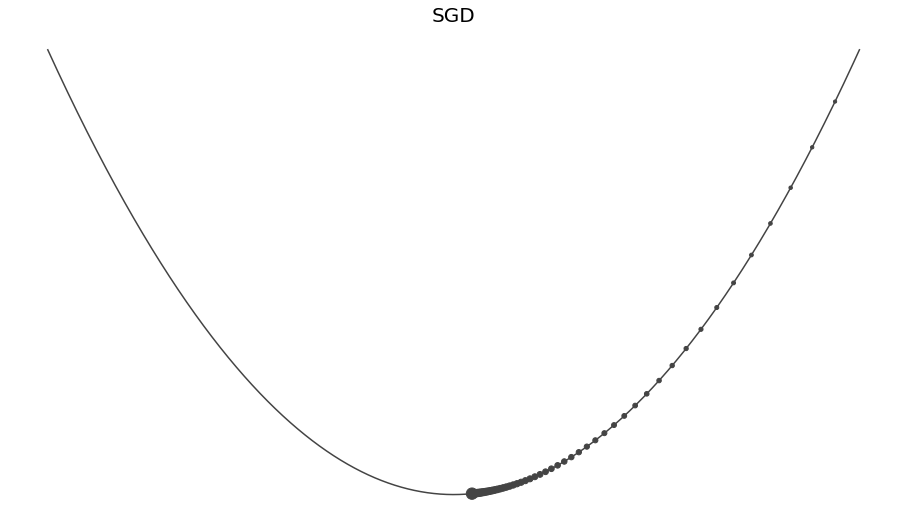

In [5]:
gd = SGDOneVariable(theta = 4, lr = 0.03, x_series = xs)
iters = gd.store_iterations(ITER)
iters_list = [iters]
SGDVisOneVariable(iters=iters_list, plot_title=PLOT_TITLE).export_frame(steps=50, n_back = 50)

In [6]:
for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [7]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd.gif' from 'sgd.mp4')

In [8]:
print(cmd_gif)

ffmpeg -i sgd.mp4 -vf palettegen palette.png -y 
ffmpeg -i sgd.mp4 -pix_fmt rgb24 -i palette.png -lavfi paletteuse sgd.gif 
rm palette.png


## Gradient Descent with LR Decay

- The learning rate is decayed until the iteration $\tau$.  

- The learning rate on the iteration $k$ calculated as $ \epsilon_k = (1-\alpha)\epsilon_0+\alpha \epsilon_{\tau}$ where $\alpha = \frac{k}{\tau}$  

- The learning rate after the iteration $\tau$ is kept constant.  
- $\epsilon_{\tau}$ is generally set to 1 % of the initial learning rate ($\epsilon_0$).    

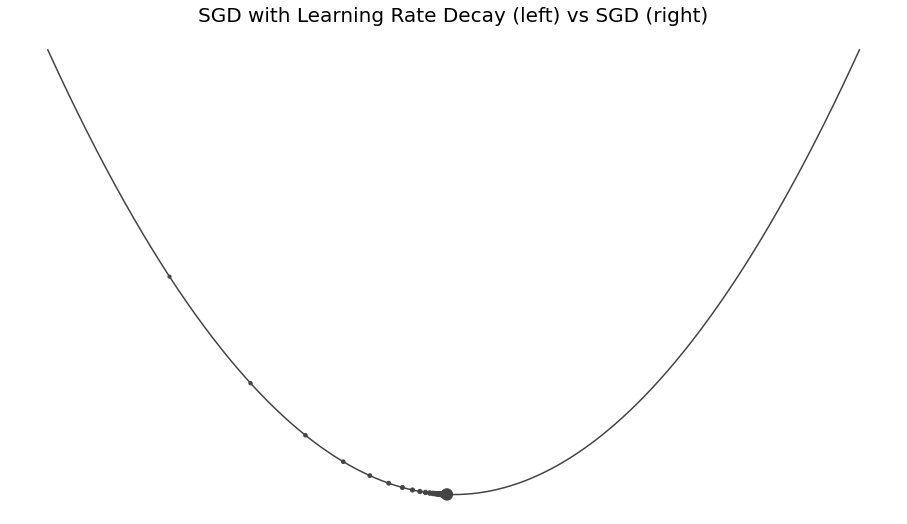

In [9]:
PLOT_TITLE =  'SGD with Learning Rate Decay (left) vs SGD (right)'
FILE_NAME_WO_EXTENSION = 'sgd-with-lr-decay'
steps_n = 50

gd = SGDOneVariableLRDecay(theta = -4, lr = 0.03*5, tau = 10, x_series = xs)
iters_lr_decay = gd.store_iterations(50)
SGDVisOneVariable(iters=[iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=100, n_back = 50)

## Compare SGD and SGD with LR Decay

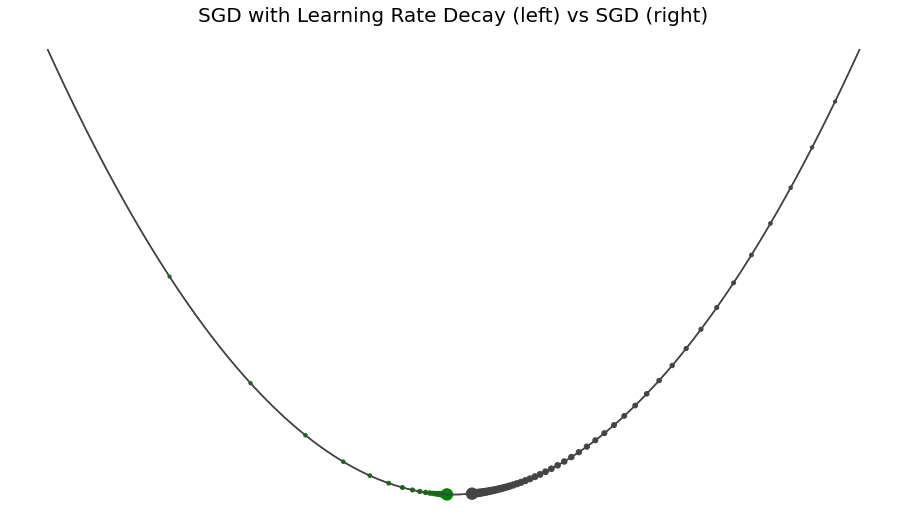

In [10]:
SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=steps_n, n_back = 50, path = '')

In [11]:
ITER = 100

for i in range(ITER):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = SGDVisOneVariable(iters=[iters, iters_lr_decay], plot_title=PLOT_TITLE).export_frame(steps=i, n_back = N_BACK, path = '')
    fig.savefig(file_path)

In [12]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-decay.gif' from 'sgd-with-decay.mp4')

# Momentum Visualization

In [2]:
from spaces.threeD import Himmelblau

# Part 1

In [3]:
h = Himmelblau(space_lim_min = -6, space_lim_max = 6,
               x_initial = -1,
               y_initial = -5)

steps = h.run_gd(epsilon = 0.001 , iteration = 100, alpha = 0.90)

from matplotlib import cm
# h.plot_steps(steps, azimuth=5, elevation = 40, color_map = cm.gray, n_back = 20, steps_until_n=40)

In [4]:

ITERS = 100
FILE_NAME_WO_EXTENSION = 'sgd-with-momentum'

import math

for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i)
    fig = h.plot_steps(steps,
                       steps_until_n=i,
                       azimuth=5-math.log(i+1),
                       elevation = 40+math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'SGD with Momentum with alpha=0.9'
                      )
    fig.savefig(file_path)

# Part 2

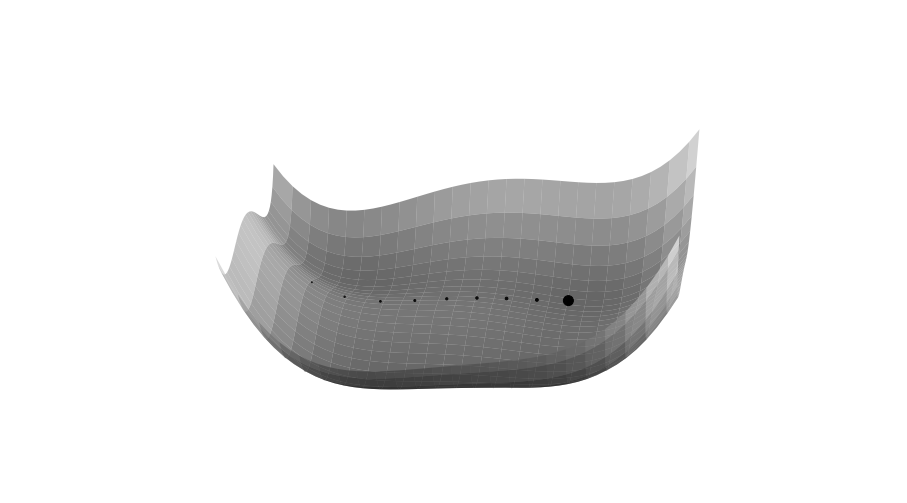

In [5]:
h = Himmelblau(space_lim_min = -6, space_lim_max = 6,
               x_initial = -1,
               y_initial = -5)

steps = h.run_gd(epsilon = 0.0015 , iteration = 100, alpha = 0.95)

from matplotlib import cm
h.plot_steps(steps, azimuth=5, elevation = 40, color_map = cm.gray, n_back = 20, steps_until_n=10)

In [6]:
for i in range(ITERS):
    file_path = 'frames/plot_{0:03}.png'.format(i+100)
    fig = h.plot_steps(steps,
                       steps_until_n=i,
                       azimuth=5+math.log(i+1),
                       elevation = 40-math.log(i+1),
                       color_map = cm.gray, n_back = 20,
                       plot_title = 'SGD with Momentum with alpha=0.95'
                      )
    fig.savefig(file_path)

In [7]:
video = Video(dir_to_save='frames', video_name=FILE_NAME_WO_EXTENSION, frame_rate = 29)
cmd_video = video.get_fmpeg_video_cmd()
os.system(cmd_video)

video

gif = GIFfromMP4Video(file_name=FILE_NAME_WO_EXTENSION, dir_to_save = '', frame_rate = 29)
cmd_gif = gif.get_fmpeg_gif_cmd()
os.system(cmd_gif)

gif

GIF('sgd-with-momentum.gif' from 'sgd-with-momentum.mp4')